Stronlgy inspired by Ji et al.

In [1]:
import sys
sys.path.append("..")
from src import *
import numpy as np
import scanpy as sc
import os
import logging
import time
from anndata import read_h5ad
import faulthandler
import argparse
import pandas as pd

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


In [2]:
logs = "../evaluation_results/subsampled/"
log_files = dict()

In [3]:
data_path = "/data/bionets/datasets/scrnaseq_ji"
datasets = dict()
subsamples = dict()
for name in os.listdir(data_path):
    log_files[name] = pd.read_csv(os.path.join(logs, f"{os.path.splitext(name)[0]}_nx_subsampled_1000_log.txt"), delimiter=";")
    if 0: #not name in datasets.keys():
        file_name = os.path.join(data_path, name)
        adata = read_h5ad(file_name)
        adata = scanpy_setup(adata)
        datasets[name] = adata
        subsamples[name] = sc.pp.subsample(adata, n_obs=np.min([10000, len(adata)]), copy=True)

In [4]:
def plot_umap(adata, color, group, axs):
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    adata.obs[color] = adata.obs[color].astype(str)
    sc.pl.umap(adata, color=color, ax=axs[0])
    sc.pl.umap(adata, color=color, groups=group, ax=axs[1])

In [5]:
log_files["norman.hdf5"]

,test_group,reference,k,p,z,s,t
0,1,control,5,3.094983e-03,-2.797924,1.0,32.199655
1,2,control,5,1.124719e-17,-8.488599,1.0,26.784712


KeyError: 'sciplex_A549.hdf5'

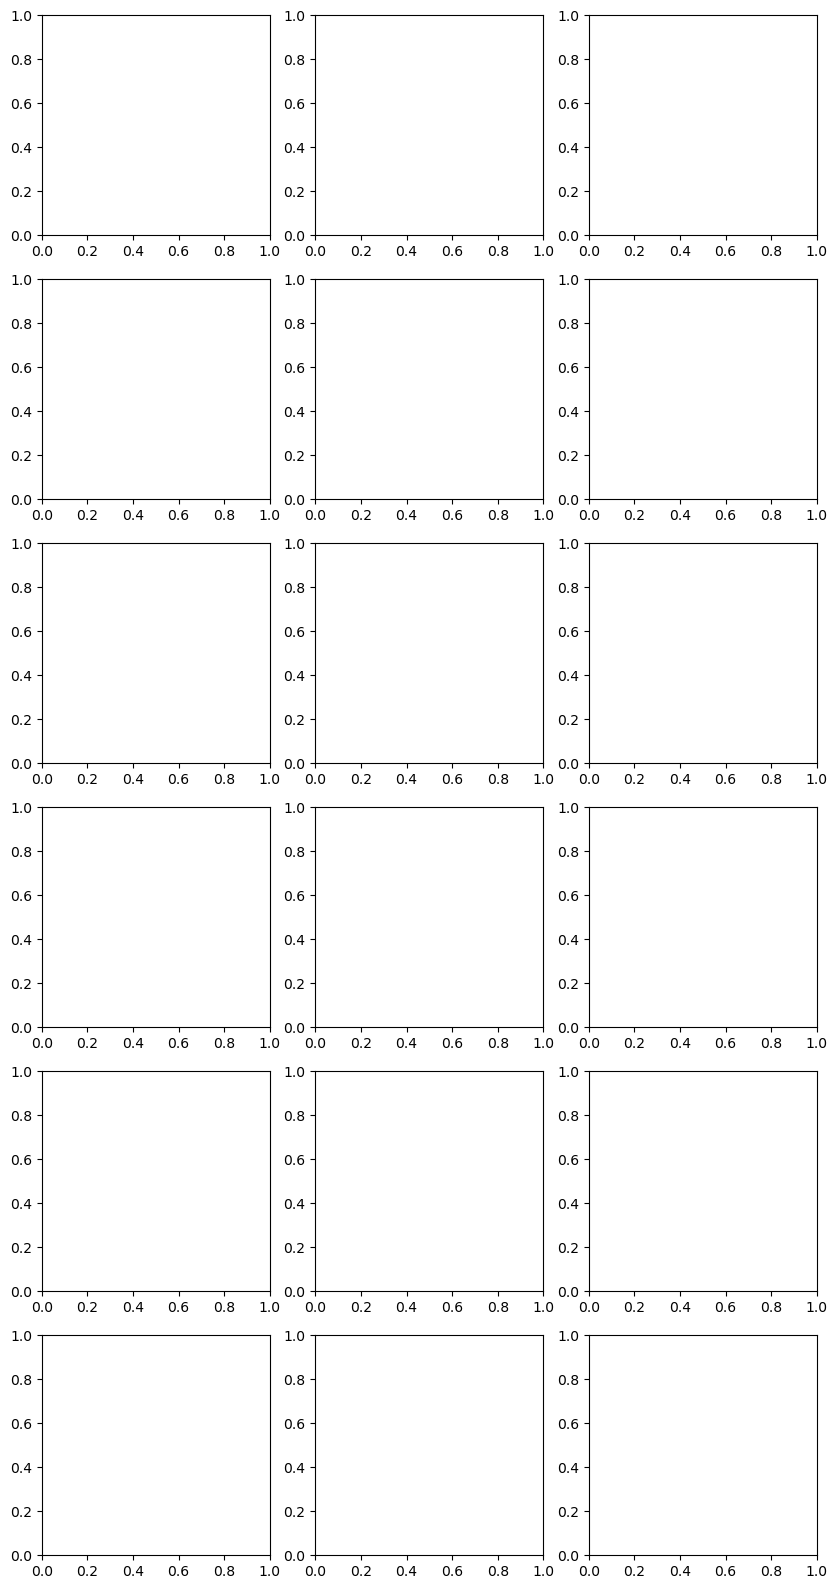

In [6]:
def plot_umap(adata, color, group, axs):
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    adata.obs[color] = adata.obs[color].astype(str)
    sc.pl.umap(adata, color=color, ax=axs[0])
    sc.pl.umap(adata, color=color, groups=group, ax=axs[1])
    
f, axs = plt.subplots(6, 3, figsize=(10, 20))#

plot_umap(subsamples['sciplex_A549.hdf5'], color="dose_value", group="0.0", axs=axs[0])
plot_umap(subsamples['sciplex_MCF7.hdf5'], color="dose_value", group="0.0", axs=axs[1])
plot_umap(subsamples['sciplex_K562.hdf5'], color="dose_value", group="0.0", axs=axs[2])
plot_umap(subsamples["schiebinger.hdf5"], color="perturbation", group="control", axs=axs[3])
plot_umap(subsamples['mcfarland.hdf5'], color="perturbation", group="control", axs=axs[4])
plot_umap(subsamples["norman.hdf5"], color="n_guides", group="control", axs=axs[5])

#plot_umap(subsamples[name], color="dose_value", group="0.0", axs=axs[0, :2])
#plot_umap(subsamples[name], color="dose_value", group="0.0", axs=axs[0, :2])
#plot_umap(subsamples[name], color="dose_value", group="0.0", axs=axs[0, :2])

In [ ]:
plot_umap(subsamples['sciplex_K562.hdf5'])